# Repetition Codes
[Repetition Codes from Qiskit Tutorial](https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/noise/6_repetition_code.ipynb)

In [33]:
from qiskit import QuantumRegister, QuantumCircuit, execute, Aer


                         
code\_qubit_0: ──■───────
                 │       
code\_qubit_1: ──┼────■──
               ┌─┴─┐┌─┴─┐
link\_qubit_0: ┤ X ├┤ X ├
               └───┘└───┘


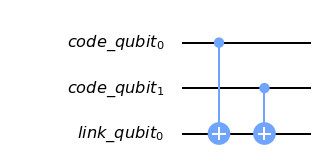

In [4]:
cq = QuantumRegister(2,'code\_qubit')
lq = QuantumRegister(1,'link\_qubit')
qc = QuantumCircuit(cq,lq)
qc.cx(cq[0],lq[0])
qc.cx(cq[1],lq[0])
print(qc)
qc.draw('mpl')

In [5]:
from qiskit.ignis.verification.topological_codes import RepetitionCode
from qiskit.ignis.verification.topological_codes import GraphDecoder
from qiskit.ignis.verification.topological_codes import lookuptable_decoding, postselection_decoding

In [18]:
d = 2
T = 1
code = RepetitionCode(d,T)

In [7]:
code.circuit

{'0': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x11cafc370>,
 '1': <qiskit.circuit.quantumcircuit.QuantumCircuit at 0x11cafca00>}

In [13]:
print ( 'code_bits:', code.code_bit, ' d=', code.d, ' T=', code.T)

code_bits: ClassicalRegister(3, 'code_bit')  d= 3  T= 2


In [15]:
code.qubit_registers

{'code_qubit', 'link_qubit'}

In [16]:
code.code_qubit

QuantumRegister(3, 'code_qubit')

In [19]:
for bit in ['0','1']:
    print('\n========= logical',bit,'=========\n')
    print( code.circuit[bit] )


========= logical 0 =========

                    ┌───┐┌───┐   ┌─┐   
      link_qubit_0: ┤ X ├┤ X ├───┤M├───
                    └─┬─┘└─┬─┘┌─┐└╥┘   
      code_qubit_0: ──■────┼──┤M├─╫────
                           │  └╥┘ ║ ┌─┐
      code_qubit_1: ───────■───╫──╫─┤M├
                               ║  ║ └╥┘
round_0_link_bit_0: ═══════════╬══╩══╬═
                               ║     ║ 
        code_bit_0: ═══════════╩═════╬═
                                     ║ 
        code_bit_1: ═════════════════╩═
                                       

========= logical 1 =========

                         ┌───┐┌───┐   ┌─┐   
      link_qubit_0: ─────┤ X ├┤ X ├───┤M├───
                    ┌───┐└─┬─┘└─┬─┘┌─┐└╥┘   
      code_qubit_0: ┤ X ├──■────┼──┤M├─╫────
                    ├───┤       │  └╥┘ ║ ┌─┐
      code_qubit_1: ┤ X ├───────■───╫──╫─┤M├
                    └───┘           ║  ║ └╥┘
round_0_link_bit_0: ════════════════╬══╩══╬═
                                    ║     ║ 
        cod

In [21]:
d = 2
T = 1
code = RepetitionCode(d,T)

for bit in ['0','1']:
    print('\n========= logical',bit,'=========\n')
    print( code.circuit[bit] )


========= logical 0 =========

                    ┌───┐┌───┐   ┌─┐   
      link_qubit_0: ┤ X ├┤ X ├───┤M├───
                    └─┬─┘└─┬─┘┌─┐└╥┘   
      code_qubit_0: ──■────┼──┤M├─╫────
                           │  └╥┘ ║ ┌─┐
      code_qubit_1: ───────■───╫──╫─┤M├
                               ║  ║ └╥┘
round_0_link_bit_0: ═══════════╬══╩══╬═
                               ║     ║ 
        code_bit_0: ═══════════╩═════╬═
                                     ║ 
        code_bit_1: ═════════════════╩═
                                       

========= logical 1 =========

                         ┌───┐┌───┐   ┌─┐   
      link_qubit_0: ─────┤ X ├┤ X ├───┤M├───
                    ┌───┐└─┬─┘└─┬─┘┌─┐└╥┘   
      code_qubit_0: ┤ X ├──■────┼──┤M├─╫────
                    ├───┤       │  └╥┘ ║ ┌─┐
      code_qubit_1: ┤ X ├───────■───╫──╫─┤M├
                    └───┘           ║  ║ └╥┘
round_0_link_bit_0: ════════════════╬══╩══╬═
                                    ║     ║ 
        cod

In [27]:
empty_code = RepetitionCode(3,0)

In [28]:
def print_circuits(code):
    for log in ['0','1']:
        print('\n========= logical',log,'=========\n')
        print( code.circuit[log] )
            
print_circuits(empty_code)


========= logical 0 =========

              
link_qubit_0: 
              
link_qubit_1: 
              
code_qubit_0: 
              
code_qubit_1: 
              
code_qubit_2: 
              

========= logical 1 =========

                   
link_qubit_0: ─────
                   
link_qubit_1: ─────
              ┌───┐
code_qubit_0: ┤ X ├
              ├───┤
code_qubit_1: ┤ X ├
              ├───┤
code_qubit_2: ┤ X ├
              └───┘


In [29]:
empty_code.syndrome_measurement()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐     ┌─┐          
      link_qubit_0: ┤ X ├─────┤ X ├─────┤M├─|0>──────
                    └─┬─┘┌───┐└─┬─┘┌───┐└╥┘ ┌─┐      
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├─╫──┤M├──|0>─
                      │  └─┬─┘  │  └─┬─┘ ║  └╥┘      
      code_qubit_0: ──■────┼────┼────┼───╫───╫───────
                           │    │    │   ║   ║       
      code_qubit_1: ───────■────■────┼───╫───╫───────
                                     │   ║   ║       
      code_qubit_2: ─────────────────■───╫───╫───────
                                         ║   ║       
round_0_link_bit_0: ═════════════════════╩═══╬═══════
                                             ║       
round_0_link_bit_1: ═════════════════════════╩═══════
                                                     

========= logical 1 =========

                         ┌───┐     ┌───┐     ┌─┐          
      link_qubit_0: ─────┤ X ├─────┤ X ├─────┤M├─|0>──────
        

In [30]:
empty_code.x()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐          ┌─┐          
      link_qubit_0: ┤ X ├─────┤ X ├──────────┤M├─|0>──────
                    └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘ ┌─┐      
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├──────╫──┤M├──|0>─
                      │  └─┬─┘  │  └─┬─┘┌───┐ ║  └╥┘      
      code_qubit_0: ──■────┼────┼────┼──┤ X ├─╫───╫───────
                           │    │    │  ├───┤ ║   ║       
      code_qubit_1: ───────■────■────┼──┤ X ├─╫───╫───────
                                     │  ├───┤ ║   ║       
      code_qubit_2: ─────────────────■──┤ X ├─╫───╫───────
                                        └───┘ ║   ║       
round_0_link_bit_0: ══════════════════════════╩═══╬═══════
                                                  ║       
round_0_link_bit_1: ══════════════════════════════╩═══════
                                                          

========= logical 1 =========

                         ┌───┐     ┌───┐          ┌

In [31]:
empty_code.readout()
print_circuits(empty_code)


========= logical 0 =========

                    ┌───┐     ┌───┐          ┌─┐                
      link_qubit_0: ┤ X ├─────┤ X ├──────────┤M├─|0>────────────
                    └─┬─┘┌───┐└─┬─┘┌───┐     └╥┘ ┌─┐            
      link_qubit_1: ──┼──┤ X ├──┼──┤ X ├──────╫──┤M├──|0>───────
                      │  └─┬─┘  │  └─┬─┘┌───┐ ║  └╥┘  ┌─┐       
      code_qubit_0: ──■────┼────┼────┼──┤ X ├─╫───╫───┤M├───────
                           │    │    │  ├───┤ ║   ║   └╥┘ ┌─┐   
      code_qubit_1: ───────■────■────┼──┤ X ├─╫───╫────╫──┤M├───
                                     │  ├───┤ ║   ║    ║  └╥┘┌─┐
      code_qubit_2: ─────────────────■──┤ X ├─╫───╫────╫───╫─┤M├
                                        └───┘ ║   ║    ║   ║ └╥┘
round_0_link_bit_0: ══════════════════════════╩═══╬════╬═══╬══╬═
                                                  ║    ║   ║  ║ 
round_0_link_bit_1: ══════════════════════════════╩════╬═══╬══╬═
                                                       ║  

In [34]:
circuits = code.get_circuit_list()
job = execute( circuits, Aer.get_backend('qasm_simulator') )
raw_results = {}
for log in ['0','1']:
    raw_results[log] = job.result().get_counts(log)
    print('\n========= logical',log,'=========\n')
    print(raw_results[log])



========= logical 0 =========

{'00 0': 1024}

========= logical 1 =========

{'11 0': 1024}
